In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

pd.set_option('display.max_columns',None)


In [5]:
## Reading Boston City related data


Boston_Calender = pd.read_csv("C:\\Users\\A04248\\Desktop\\Boston\\calendar.csv")



In [6]:
Boston_Calender.sample(5)

,listing_id,date,available,price
333683,5885130,2017-02-28,t,$295.00
86218,14474750,2017-04-05,f,NaN
789415,9425087,2016-11-24,f,NaN
730919,8782592,2017-02-15,f,NaN
959639,3181719,2017-04-29,t,$135.00


In [7]:
print('Boston_Calender Shape', Boston_Calender.shape,'\n')

Boston_Calender Shape (1308890, 4) 



In [8]:
## Reading Seattle City related data

Seattle_Calender = pd.read_csv("C:\\Users\\A04248\\Desktop\\Seattle\\calendar.csv")



In [9]:
Seattle_Calender.sample(5)

,listing_id,date,available,price
939546,7070169,2016-02-09,t,$96.00
1271192,9508837,2016-09-22,t,$99.00
510083,6403878,2016-06-30,f,NaN
872685,4681687,2016-12-04,t,$58.00
527441,5031383,2016-01-20,t,$40.00


In [10]:
print('Seattle_Calender Shape', Seattle_Calender.shape)


Seattle_Calender Shape (1393570, 4)


In [11]:
#What is the best time to Visit Seattle and Boston

In [12]:
## Calender Date Range for Boston
## So we have 1 Full year Data

print('Boston Calender Starting Date', Boston_Calender['date'].min())
print('Boston Calender Ending Date',   Boston_Calender['date'].max())

Boston Calender Starting Date 2016-09-06
Boston Calender Ending Date 2017-09-05


In [13]:
# Column 'price' has around 50% null values

Boston_Calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [14]:
#Dropping the rows where price has Nan values. Since nan values are around 50%, amputing them may introduce bias

Boston_Calender = Boston_Calender.dropna(subset = ['price'],how = 'any')
Boston_Calender.isnull().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

In [15]:
# Removing $ and , from Price column's values

Boston_Calender['price'] = Boston_Calender['price'].str.replace('$','').str.replace(',','')


C:\Users\A04248\AppData\Local\Temp\ipykernel_1648\778455269.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Boston_Calender['price'] = Boston_Calender['price'].str.replace('$','').str.replace(',','')


In [16]:
#Changing datatype for date column from object to datetime so that we can perform datetime operation
#Changing datatype for price column from object to float so that we can perform mathematical operation


Boston_Calender['date'] = pd.to_datetime(Boston_Calender['date'])
Boston_Calender['price'] = Boston_Calender['price'].astype(float)


<AxesSubplot:ylabel='price'>

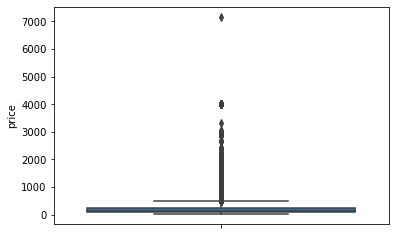

In [17]:
#Price column can have outliers. Checking for outliers

sns.boxplot(y = Boston_Calender['price'])

In [18]:

def Outlier_Treatment(data):
    
    Q1 = np.percentile(data,25)
    Q3= np.percentile(data,75) 
    IQR = Q3-Q1
    
    Upper_IQR_bound = (Q3)+(1.5*IQR) 
    Lower_IQR_bound = (Q1)-(1.5*IQR)
    
    data = np.where(data>Upper_IQR_bound,Upper_IQR_bound,data) 
    data = np.where(data<Lower_IQR_bound,Lower_IQR_bound,data)
    
    return data

<AxesSubplot:ylabel='price'>

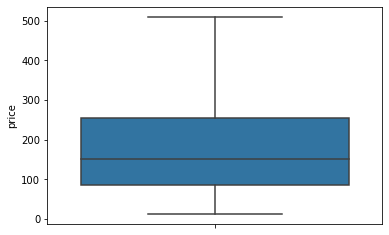

In [19]:
Boston_Calender['price'] = Outlier_Treatment(Boston_Calender['price'])
sns.boxplot(y = Boston_Calender['price'])

In [20]:
Boston_Calender['price'].describe()

count    643037.000000
mean        189.031208
std         126.205048
min          11.000000
25%          85.000000
50%         150.000000
75%         255.000000
max         510.000000
Name: price, dtype: float64

In [21]:
## Adding a new column 'Month' and Week as we are check what is best month for visting Boston

Boston_Calender['Month'] = Boston_Calender['date'].dt.month_name()
Boston_Calender['Week_Number'] = Boston_Calender['date'].dt.isocalendar().week
Boston_Calender = Boston_Calender.sort_values(by = ['Week_Number']).reset_index()
Boston_Calender

,index,listing_id,date,available,price,Month,Week_Number
0,1056191,57156,2017-01-02,t,95.0,January,1
1,922575,11760822,2017-01-02,t,130.0,January,1
2,862741,8428314,2017-01-02,t,199.0,January,1
3,1227737,14251839,2017-01-06,t,99.0,January,1
4,1227738,14251839,2017-01-05,t,79.0,January,1
...,...,...,...,...,...,...,...
643032,64115,4149974,2016-12-31,t,103.0,December,52
643033,64114,4149974,2017-01-01,t,103.0,January,52
643034,63757,3730447,2017-01-01,t,180.0,January,52
643035,173918,10328539,2016-12-30,t,100.0,December,52


<AxesSubplot:xlabel='Month'>

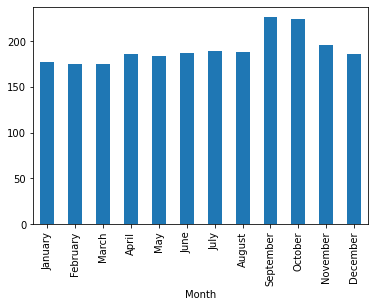

In [22]:
Boston_Calender.groupby(['Month'],sort = False)['price'].mean().plot(kind = 'bar')

In [23]:
## Seattle

In [24]:
## Calender Date Range for Seattle
## So we have 1 Full year Data

print('Seattle Calender Starting Date', Seattle_Calender['date'].min())
print('Seattle Calender Ending Date',   Seattle_Calender['date'].max())

Seattle Calender Starting Date 2016-01-04
Seattle Calender Ending Date 2017-01-02


In [25]:
# Column 'price' has around 25% null values

Seattle_Calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [26]:
#Dropping the rows where price has Nan values. 

Seattle_Calender = Seattle_Calender.dropna(subset = ['price'],how = 'any')
Seattle_Calender.isnull().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

In [27]:
# Removing $ and , from Price column's values

Seattle_Calender['price'] = Seattle_Calender['price'].str.replace('$','').str.replace(',','')

C:\Users\A04248\AppData\Local\Temp\ipykernel_1648\3455125904.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Seattle_Calender['price'] = Seattle_Calender['price'].str.replace('$','').str.replace(',','')


In [28]:
#Changing datatype for date column from object to datetime so that we can perform datetime operation
#Changing datatype for price column from object to float so that we can perform mathematical operation


Seattle_Calender['date'] = pd.to_datetime(Seattle_Calender['date'])
Seattle_Calender['price'] = Seattle_Calender['price'].astype(float)


<AxesSubplot:ylabel='price'>

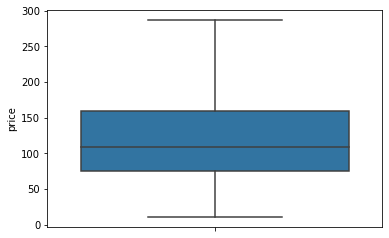

In [29]:
Seattle_Calender['price'] = Outlier_Treatment(Seattle_Calender['price'])
sns.boxplot(y = Seattle_Calender['price'])


In [30]:
Seattle_Calender['price'].describe()

count    934542.000000
mean        128.110183
std          70.429741
min          10.000000
25%          75.000000
50%         109.000000
75%         160.000000
max         287.500000
Name: price, dtype: float64

In [31]:
## Adding a new column 'Month' and Week as we are check what is best month for visting Seattle

Seattle_Calender['Month'] = Seattle_Calender['date'].dt.month_name()
Seattle_Calender['Week_Number'] = Seattle_Calender['date'].dt.isocalendar().week
Seattle_Calender = Seattle_Calender.sort_values(by = ['Week_Number']).reset_index()
Seattle_Calender

,index,listing_id,date,available,price,Month,Week_Number
0,0,241032,2016-01-04,t,85.0,January,1
1,25185,10234558,2016-01-04,t,50.0,January,1
2,25184,7618605,2017-01-02,t,175.0,January,1
3,633639,353347,2017-01-02,t,200.0,January,1
4,633640,838764,2016-01-04,t,240.0,January,1
...,...,...,...,...,...,...,...
934537,769053,6416765,2017-01-01,t,149.0,January,52
934538,769412,5056580,2016-12-26,t,99.0,December,52
934539,769413,5056580,2016-12-27,t,99.0,December,52
934540,767957,10020221,2016-12-31,t,55.0,December,52


<AxesSubplot:xlabel='Month'>

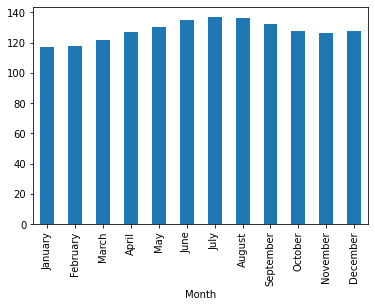

In [32]:
Seattle_Calender.groupby(['Month'],sort = False)['price'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Month'>

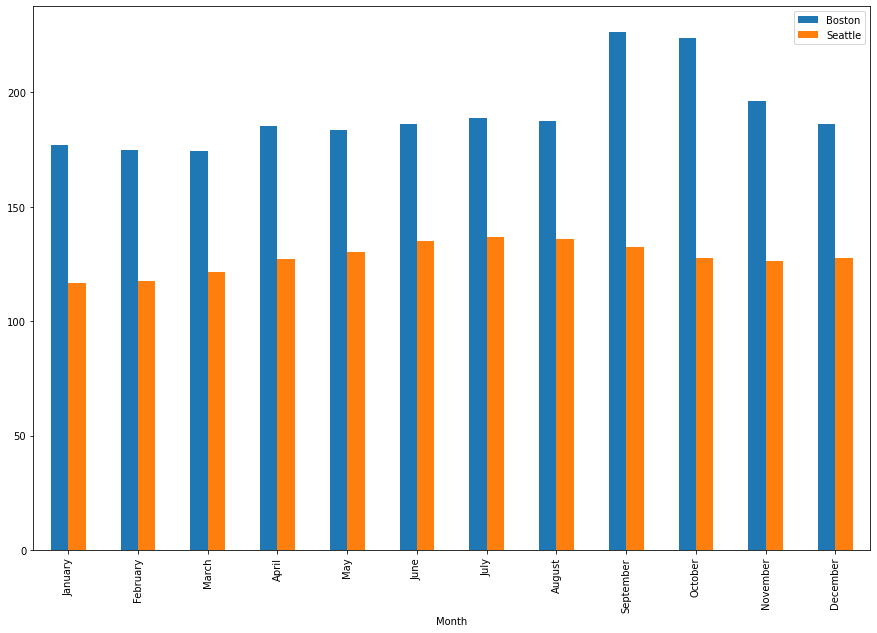

In [33]:
Boston_df = Boston_Calender.groupby(['Month'],sort = False,as_index=False)['price'].mean()
Seattle_df = Seattle_Calender.groupby(['Month'],sort = False,as_index = False)['price'].mean()

df = pd.merge(Boston_df, Seattle_df,on = 'Month')

df = df.rename(columns = {'price_x':'Boston','price_y':'Seattle'})

# plt.style.use('seaborn')
# plt.tight_layout()

df.plot(kind = 'bar',x = 'Month',figsize = [15,10])



In [34]:
df['Diff_Prices'] = ((df['Boston'] - df['Seattle'])/df['Boston']*100)
df['Diff_Prices'] = df['Diff_Prices'].round(2)

df.style.bar(subset = ['Diff_Prices'],align = 'mid',color=['#d65f5f', '#5fba7d'])


,Month,Boston,Seattle,Diff_Prices
0,January,177.115636,116.902790,34.000000
1,February,174.638391,117.743205,32.580000
2,March,174.401406,121.689854,30.220000
3,April,185.347651,127.126945,31.410000
4,May,183.537500,130.273462,29.020000
5,June,186.397262,134.875110,27.640000
6,July,188.772502,136.950176,27.450000
7,August,187.528734,136.116894,27.420000
8,September,226.264387,132.621683,41.390000
9,October,223.906398,127.693157,42.970000


Boston_Price_Hike 22.33207822142115


<AxesSubplot:>

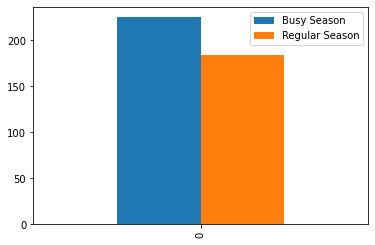

In [44]:
Boston_Busy_Season_Price = df['Boston'][df['Boston']>200].mean() 
Boston_Reg_Season_Price = df['Boston'][df['Boston']<200].mean()
Boston_Price_Hike = (Boston_Busy_Season_Price - Boston_Reg_Season_Price)/Boston_Reg_Season_Price*100
print('Boston_Price_Hike',Boston_Price_Hike)

Boston_Season_Diff = pd.DataFrame({'Busy Season' : [Boston_Busy_Season_Price],'Regular Season':[Boston_Reg_Season_Price]})
Boston_Season_Diff.plot(kind = 'bar')

#plt.bar(Boston_Busy_Season_Price,Boston_Reg_Season_Price)

Seattle_Price_Hike 8.542621085423113


<AxesSubplot:>

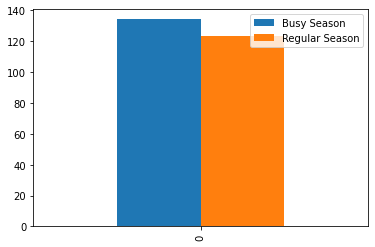

In [45]:
Seattle_Busy_Season_Price = df['Seattle'][df['Seattle']>130].mean() 
Seattle_Reg_Season_Price = df['Seattle'][df['Seattle']<130].mean()
Seattle_Price_Hike = (Seattle_Busy_Season_Price - Seattle_Reg_Season_Price)/Seattle_Reg_Season_Price*100
print('Seattle_Price_Hike',Seattle_Price_Hike)

Seattle_Season_Diff = pd.DataFrame({'Busy Season':[Seattle_Busy_Season_Price],'Regular Season':[Seattle_Reg_Season_Price]})
Seattle_Season_Diff.plot(kind ='bar')